# 分析场景的类别

In [ ]:
/home/liyong/code/svpretrain/places365/merged_train_sv_places365.csv

/home/liyong/code/CityHomogeneity/output/baidu/V3/train_loss_feature_allcity_300ep_homogeneity_name.pkl

## 分类

In [45]:
import numpy as np
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

csv_path = "/home/liyong/code/CityHomogeneity/output/classification/qwen_cls_merged_homo_with_expand_gub.csv"
out_root = "/home/liyong/code/CityHomogeneity/output/figures/category_lineplots_by_category_expand_gub_NAME2_subplots"
os.makedirs(out_root, exist_ok=True)

df = pd.read_csv(csv_path, dtype={"category_text": str, "NAME_1": str, "NAME_2": str, "expand_gub": str})
df["homogeneity"] = pd.to_numeric(df["homogeneity"], errors="coerce")
df["expand_gub"] = pd.to_numeric(df["expand_gub"], errors="coerce").astype("Int64")
df = df.dropna(subset=["category_text", "homogeneity", "NAME_2", "expand_gub"])

def fix_taizhou(row):
    if row["NAME_2"].lower() == "taizhou":
        if str(row["NAME_1"]).lower() == "zhejiang":
            return "Taizhou(ZJ)"
        elif str(row["NAME_1"]).lower() == "jiangsu":
            return "Taizhou(JS)"
    return row["NAME_2"]

df["city_fixed"] = df.apply(fix_taizhou, axis=1)

def slug(s: str) -> str:
    s = s.strip().lower()
    s = re.sub(r"[^\w]+", "_", s)
    return re.sub(r"_+", "_", s).strip("_")

categories = sorted(df["category_text"].dropna().unique())
cities = sorted(df["city_fixed"].dropna().unique())

trend_result = {}

for category in categories:
    cat_df = df[df["category_text"] == category].copy()
    up_cities = []
    down_flat_cities = []
    for city in cities:
        city_df = cat_df[cat_df["city_fixed"] == city]
        if city_df.empty or city_df["expand_gub"].nunique() < 3:
            continue
        city_df = city_df.sort_values("expand_gub")
        x = city_df["expand_gub"].values
        y = city_df["homogeneity"].values
        slope = np.polyfit(x, y, 1)[0]
        if slope > 0.001:
            up_cities.append(city)
        else:
            down_flat_cities.append(city)
    trend_result[category] = {
        "increase": up_cities,
        "decrease": down_flat_cities
    }
    print(f"# {category}")
    print("# 上升型城市：")
    print(up_cities)
    print("# 下降/平稳型城市：")
    print(down_flat_cities)
    print()

# GENERAL_COMMERCIAL
# 上升型城市：
['Anqing', 'Chizhou', 'Chuzhou', 'Foshan', 'Guangzhou', 'Hangzhou', 'Huizhou', 'Huzhou', 'Jiangmen', 'Jiaxing', 'Jinhua', 'Nanjing', 'Nantong', 'Ningbo', 'Qinhuangdao', 'Shanghai', 'Shaoxing', 'Shenzhen', 'Shijiazhuang', 'Suzhou', 'Taizhou(JS)', 'Taizhou(ZJ)', 'Tianjin', 'Wenzhou', 'Wuxi', 'Xingtai', 'Yangzhou', 'Zhangjiakou', 'Zhaoqing', 'Zhenjiang', 'Zhongshan', 'Zhoushan', 'Zhuhai']
# 下降/平稳型城市：
['Baoding', 'Beijing', 'Cangzhou', 'Changzhou', 'Chengde', 'Handan', 'Hefei', 'Hengshui', 'Langfang', 'Maanshan', 'Tangshan', 'Tongling', 'Wuhu', 'Xuancheng', 'Yancheng']

# HIGH_DENSITY_COMMERCIAL
# 上升型城市：
['Anqing', 'Beijing', 'Chuzhou', 'Foshan', 'Guangzhou', 'Handan', 'Hangzhou', 'Hefei', 'Hengshui', 'Huizhou', 'Huzhou', 'Jiangmen', 'Jinhua', 'Shanghai', 'Suzhou', 'Taizhou(JS)', 'Taizhou(ZJ)', 'Tianjin', 'Wenzhou', 'Wuhu', 'Yangzhou', 'Zhongshan', 'Zhuhai']
# 下降/平稳型城市：
['Baoding', 'Cangzhou', 'Changzhou', 'Chengde', 'Chizhou', 'Jiaxing', 'Langfang', 'Maanshan

In [ ]:
import numpy as np
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
# --- 新增的导入 ---
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# --- 你的原始代码从这里开始 ---
csv_path = "/home/liyong/code/CityHomogeneity/output/classification/qwen_cls_merged_homo_with_expand_gub.csv"
out_root = "/home/liyong/code/CityHomogeneity/output/figures/category_lineplots_by_category_expand_gub_NAME2_subplots"
os.makedirs(out_root, exist_ok=True)

df = pd.read_csv(csv_path, dtype={"category_text": str, "NAME_1": str, "NAME_2": str, "expand_gub": str})
df["homogeneity"] = pd.to_numeric(df["homogeneity"], errors="coerce")
df["expand_gub"] = pd.to_numeric(df["expand_gub"], errors="coerce").astype("Int64")
df = df.dropna(subset=["category_text", "homogeneity", "NAME_2", "expand_gub"])

def fix_taizhou(row):
    if row["NAME_2"].lower() == "taizhou":
        if str(row["NAME_1"]).lower() == "zhejiang":
            return "Taizhou(ZJ)"
        elif str(row["NAME_1"]).lower() == "jiangsu":
            return "Taizhou(JS)"
    # --- 【代码修正】 ---
    # 之前的 return 缩进错误。这一行应该在最外层，
    # 以确保非 "Taizhou" 的城市名能被正确返回。
    return row["NAME_2"]

df["city_fixed"] = df.apply(fix_taizhou, axis=1)

def slug(s: str) -> str:
    s = s.strip().lower()
    s = re.sub(r"[^\w]+", "_", s)
    return re.sub(r"_+", "_", s).strip("_")

categories = sorted(df["category_text"].dropna().unique())
cities = sorted(df["city_fixed"].dropna().unique())

# --- 你的原始代码到这里结束 ---

# ==========================================================
# --- 自动聚类分析（方法二）从这里开始 ---
# ==========================================================

# 我们将以你的图 (image_7c4780.png) 所示的 "General Commercial" 为例
category_to_process = "GENERAL_COMMERCIAL"
print(f"\n--- 正在处理类别: {category_to_process} ---")

# 1. 筛选并重塑数据
cat_df = df[df["category_text"] == category_to_process].copy()

# 将数据透视，使每个城市为一行，每年为一列
time_series_df = cat_df.pivot_table(
    index="city_fixed", 
    columns="expand_gub", 
    values="homogeneity"
)

# 丢弃缺少年份数据的城市（K-Means 不能处理 NaNs）
time_series_df = time_series_df.dropna()

if time_series_df.empty:
    print(f"在 {category_to_process} 类别中没有找到完整的时序数据。")
else:
    print(f"找到 {len(time_series_df)} 个拥有完整数据的城市。")

    # 2. 提取特征 (Feature Engineering)
    
    # 特征 1: 最终值 (end_value)
    end_year = time_series_df.columns.max()
    end_value = time_series_df[end_year]
    
    # 特征 2: 峰值到终点的下降幅度 (peak_to_end_drop)
    max_value = time_series_df.max(axis=1) # 沿时间轴（列）找最大值
    peak_to_end_drop = max_value - end_value
    
    # 创建特征 DataFrame
    features_df = pd.DataFrame({
        "end_value": end_value,
        "peak_to_end_drop": peak_to_end_drop
    })
    
    # 3. 标准化特征 (K-Means 对尺度敏感)
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features_df)
    
    # 4. 运行 K-Means 聚类
    kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(features_scaled)
    
    # 将聚类结果 (0 或 1) 添加回 DataFrame
    features_df['cluster'] = clusters
    
    # 5. 自动标记聚类 (0/1 -> "Increase"/"Decline")
    
    # 检查哪个聚类的 "peak_to_end_drop" 均值更高
    cluster_means = features_df.groupby('cluster').mean()
    
    print("\n聚类中心的特征均值 (用于自动标记):")
    print(cluster_means)
    
    # "Decline" 组的 'peak_to_end_drop' 均值会显著更高
    decline_cluster_label = cluster_means['peak_to_end_drop'].idxmax()
    increase_cluster_label = 1 - decline_cluster_label
    
    print(f"\n聚类 {decline_cluster_label} 被标记为 'Decline' (因为有更高的 'peak_to_end_drop')")
    print(f"聚类 {increase_cluster_label} 被标记为 'Increase'")
    
    # 将语义标签映射回
    features_df['Trend_Group'] = features_df['cluster'].apply(
        lambda x: 'Decline' if x == decline_cluster_label else 'Increase'
    )
    
    # 6. 输出最终的城市列表
    print("\n--- 自动分组结果 ---")
    
    increase_cities = sorted(features_df[features_df['Trend_Group'] == 'Increase'].index.tolist())
    decline_cities = sorted(features_df[features_df['Trend_Group'] == 'Decline'].index.tolist())
    
    print(f"\n'Increase' (上升) 组城市 ({len(increase_cities)}):")
    print(increase_cities)
    
    print(f"\n'Decline' (下降) 组城市 ({len(decline_cities)}):")
    print(decline_cities)

In [ ]:
# GENERAL_COMMERCIAL
# 上升型城市：
['Anqing', 'Baoding', 'Beijing', 'Chizhou', 'Chuzhou', 'Foshan', 'Guangzhou', 'Handan', 'Hangzhou', 'Hefei', 'Hengshui', 'Huizhou', 'Huzhou', 'Jiangmen', 'Jiaxing', 'Jinhua', 'Maanshan', 'Nanjing', 'Nantong', 'Ningbo', 'Qinhuangdao', 'Shanghai', 'Shaoxing', 'Shenzhen', 'Shijiazhuang', 'Suzhou', 'Taizhou(JS)', 'Taizhou(ZJ)', 'Tangshan', 'Tianjin', 'Tongling', 'Wenzhou', 'Wuhu', 'Wuxi', 'Xingtai', 'Xuancheng', 'Yangzhou', 'Zhangjiakou', 'Zhaoqing', 'Zhenjiang', 'Zhongshan', 'Zhoushan', 'Zhuhai']
# 下降/平稳型城市：
['Cangzhou', 'Changzhou', 'Chengde', 'Langfang', 'Yancheng']

# HIGH_DENSITY_COMMERCIAL
# 上升型城市：
['Anqing', 'Beijing', 'Cangzhou', 'Chuzhou', 'Foshan', 'Guangzhou', 'Handan', 'Hangzhou', 'Hefei', 'Hengshui', 'Huizhou', 'Huzhou', 'Jiangmen', 'Jiaxing', 'Jinhua', 'Nantong', 'Qinhuangdao', 'Shanghai', 'Shaoxing', 'Shenzhen', 'Shijiazhuang', 'Suzhou', 'Taizhou(JS)', 'Taizhou(ZJ)', 'Tianjin', 'Wenzhou', 'Wuhu', 'Yangzhou', 'Zhongshan', 'Zhuhai']
# 下降/平稳型城市：
['Baoding', 'Changzhou', 'Chengde', 'Chizhou', 'Langfang', 'Maanshan', 'Nanjing', 'Ningbo', 'Tangshan', 'Wuxi', 'Xingtai', 'Xuancheng', 'Yancheng', 'Zhangjiakou', 'Zhaoqing', 'Zhenjiang', 'Zhoushan']

# HIGH_DENSITY_RESIDENTIAL
# 上升型城市：
['Anqing', 'Baoding', 'Changzhou', 'Chizhou', 'Chuzhou', 'Foshan', 'Guangzhou', 'Handan', 'Hangzhou', 'Hengshui', 'Huizhou', 'Huzhou', 'Jiangmen', 'Jiaxing', 'Jinhua', 'Nanjing', 'Nantong', 'Ningbo', 'Qinhuangdao', 'Shanghai', 'Shaoxing', 'Shenzhen', 'Shijiazhuang', 'Suzhou', 'Taizhou(JS)', 'Taizhou(ZJ)', 'Tangshan', 'Tianjin', 'Tongling', 'Wenzhou', 'Wuxi', 'Xingtai', 'Yancheng', 'Yangzhou', 'Zhaoqing', 'Zhenjiang', 'Zhongshan', 'Zhoushan', 'Zhuhai']
# 下降/平稳型城市：
['Beijing', 'Cangzhou', 'Chengde', 'Hefei', 'Langfang', 'Maanshan', 'Wuhu', 'Xuancheng', 'Zhangjiakou']

# INDUSTRIAL
# 上升型城市：
['Anqing', 'Baoding', 'Cangzhou', 'Changzhou', 'Chengde', 'Chizhou', 'Chuzhou', 'Foshan', 'Guangzhou', 'Handan', 'Hangzhou', 'Hefei', 'Hengshui', 'Huizhou', 'Huzhou', 'Jiangmen', 'Jiaxing', 'Jinhua', 'Langfang', 'Maanshan', 'Nanjing', 'Nantong', 'Ningbo', 'Qinhuangdao', 'Shanghai', 'Shaoxing', 'Shenzhen', 'Shijiazhuang', 'Suzhou', 'Taizhou(JS)', 'Taizhou(ZJ)', 'Tianjin', 'Tongling', 'Wenzhou', 'Wuhu', 'Wuxi', 'Xingtai', 'Yancheng', 'Yangzhou', 'Zhangjiakou', 'Zhaoqing', 'Zhenjiang', 'Zhongshan', 'Zhuhai']
# 下降/平稳型城市：
['Beijing', 'Tangshan', 'Xuancheng', 'Zhoushan']

# LOW_DENSITY_RESIDENTIAL
# 上升型城市：
['Anqing', 'Baoding', 'Beijing', 'Cangzhou', 'Changzhou', 'Chizhou', 'Chuzhou', 'Foshan', 'Guangzhou', 'Handan', 'Hangzhou', 'Hefei', 'Hengshui', 'Huizhou', 'Huzhou', 'Jiangmen', 'Jiaxing', 'Jinhua', 'Langfang', 'Maanshan', 'Nanjing', 'Nantong', 'Ningbo', 'Qinhuangdao', 'Shanghai', 'Shaoxing', 'Shenzhen', 'Shijiazhuang', 'Suzhou', 'Taizhou(JS)', 'Taizhou(ZJ)', 'Tangshan', 'Tianjin', 'Tongling', 'Wenzhou', 'Wuhu', 'Wuxi', 'Xingtai', 'Xuancheng', 'Yancheng', 'Yangzhou', 'Zhangjiakou', 'Zhaoqing', 'Zhenjiang', 'Zhongshan', 'Zhoushan', 'Zhuhai']
# 下降/平稳型城市：
['Chengde']

# OTHER
# 上升型城市：
['Anqing', 'Baoding', 'Cangzhou', 'Changzhou', 'Guangzhou', 'Hangzhou', 'Hefei', 'Hengshui', 'Huizhou', 'Jiangmen', 'Jinhua', 'Langfang', 'Maanshan', 'Nanjing', 'Nantong', 'Ningbo', 'Qinhuangdao', 'Shanghai', 'Shaoxing', 'Shenzhen', 'Shijiazhuang', 'Suzhou', 'Taizhou(JS)', 'Taizhou(ZJ)', 'Tianjin', 'Wenzhou', 'Wuhu', 'Wuxi', 'Xingtai', 'Xuancheng', 'Yancheng', 'Zhaoqing', 'Zhenjiang', 'Zhongshan', 'Zhuhai']
# 下降/平稳型城市：
['Beijing', 'Chengde', 'Chizhou', 'Chuzhou', 'Foshan', 'Handan', 'Huzhou', 'Jiaxing', 'Tangshan', 'Tongling', 'Yangzhou', 'Zhangjiakou', 'Zhoushan']

# PARK_OPEN_SPACE
# 上升型城市：
['Anqing', 'Baoding', 'Cangzhou', 'Changzhou', 'Chengde', 'Chizhou', 'Chuzhou', 'Foshan', 'Guangzhou', 'Handan', 'Hangzhou', 'Hefei', 'Hengshui', 'Huizhou', 'Huzhou', 'Jiangmen', 'Jiaxing', 'Jinhua', 'Langfang', 'Maanshan', 'Nanjing', 'Nantong', 'Ningbo', 'Qinhuangdao', 'Shanghai', 'Shaoxing', 'Shenzhen', 'Shijiazhuang', 'Suzhou', 'Taizhou(JS)', 'Taizhou(ZJ)', 'Tangshan', 'Tianjin', 'Tongling', 'Wenzhou', 'Wuxi', 'Xingtai', 'Yangzhou', 'Zhaoqing', 'Zhenjiang', 'Zhongshan', 'Zhoushan', 'Zhuhai']
# 下降/平稳型城市：
['Beijing', 'Wuhu', 'Xuancheng', 'Yancheng', 'Zhangjiakou']


In [50]:
import numpy as np
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# --- 新增的导入 ---
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats import linregress
from sklearn.metrics import silhouette_score # 用于自动判断 K=1 还是 K=2

# --- 你的原始代码从这里开始 ---
csv_path = "/home/liyong/code/CityHomogeneity/output/classification/qwen_cls_merged_homo_with_expand_gub.csv"
out_root = "/home/liyong/code/CityHomogeneity/output/figures/category_lineplots_by_category_expand_gub_NAME2_subplots"
os.makedirs(out_root, exist_ok=True)

df = pd.read_csv(csv_path, dtype={"category_text": str, "NAME_1": str, "NAME_2": str, "expand_gub": str})
df["homogeneity"] = pd.to_numeric(df["homogeneity"], errors="coerce")
df["expand_gub"] = pd.to_numeric(df["expand_gub"], errors="coerce").astype("Int64")
df = df.dropna(subset=["category_text", "homogeneity", "NAME_2", "expand_gub"])

def fix_taizhou(row):
    if row["NAME_2"].lower() == "taizhou":
        if str(row["NAME_1"]).lower() == "zhejiang":
            return "Taizhou(ZJ)"
        elif str(row["NAME_1"]).lower() == "jiangsu":
            return "Taizhou(JS)"
    return row["NAME_2"]

df["city_fixed"] = df.apply(fix_taizhou, axis=1)

def slug(s: str) -> str:
    s = s.strip().lower()
    s = re.sub(r"[^\w]+", "_", s)
    return re.sub(r"_+", "_", s).strip("_")

categories = sorted(df["category_text"].dropna().unique())
cities = sorted(df["city_fixed"].dropna().unique())
# --- 你的原始代码到这里结束 ---


# ==========================================================
# --- 自动聚类分析（循环处理所有类别）---
# ==========================================================

# 定义一个函数来计算斜率
def calculate_slope(y_values):
    # 假设 x_years 是在函数外部定义的
    try:
        # linregress 返回: slope, intercept, r_value, p_value, std_err
        return linregress(x_years, y_values)[0]
    except ValueError:
        return np.nan

# 存储所有结果的最终字典
all_group_defs = {}

print("="*50)
print("开始对所有类别进行自动趋势聚类...")
print("="*50)

for category in categories:
    print(f"\n--- 正在处理类别: {category} ---")
    
    category_groups = {} # 存储这个类别的分组
    
    cat_df = df[df["category_text"] == category].copy()
    time_series_df = cat_df.pivot_table(
        index="city_fixed", 
        columns="expand_gub", 
        values="homogeneity"
    )
    
    # 丢弃任何有缺失年份的城市
    time_series_df = time_series_df.dropna()
    
    # --- 边缘情况处理 ---
    if time_series_df.empty:
        print("...没有找到拥有完整时序数据的城市，跳过。")
        all_group_defs[category] = {'Increase': [], 'Decline': []}
        continue

    # 聚类至少需要2个样本
    if len(time_series_df) < 2:
        print(f"...仅找到 {len(time_series_df)} 个城市，自动归入 'Increase' 组。")
        category_groups['Increase'] = sorted(time_series_df.index.tolist())
        category_groups['Decline'] = []
        all_group_defs[category] = category_groups
        continue

    # --- 1. 提取特征 (Feature Engineering) ---
    
    # 特征 1: 最终值 (end_value)
    end_year = time_series_df.columns.max()
    end_value = time_series_df[end_year]
    
    # 特征 2: 峰值到终点的下降幅度 (peak_to_end_drop)
    max_value = time_series_df.max(axis=1) 
    peak_to_end_drop = max_value - end_value
    
    # 特征 3: 总体斜率 (overall_slope)
    x_years = time_series_df.columns.values.astype(float)
    overall_slope = time_series_df.apply(calculate_slope, axis=1)
    
    features_df = pd.DataFrame({
        "end_value": end_value,
        "peak_to_end_drop": peak_to_end_drop,
        "overall_slope": overall_slope
    })
    
    # 再次处理以防万一 (e.g., calculate_slope 失败)
    features_df = features_df.dropna() 
    
    if len(features_df) < 2:
        print("...特征提取后剩余城市不足2个，跳过。")
        continue
        
    # 2. 标准化特征
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features_df)
    
    # 3. 【自动 K 选择】使用剪影分数判断 K=1 还是 K=2
    n_clusters = 1 # 默认 K=1
    
    # 剪影分数至少需要2个簇，并且样本数要 > 簇数
    # 为了安全，我们至少需要3个城市才能尝试 K=2
    if len(features_scaled) >= 3:
        kmeans_test = KMeans(n_clusters=2, random_state=42, n_init=10).fit(features_scaled)
        score = silhouette_score(features_scaled, kmeans_test.labels_)
        print(f"...K=2 的剪影分数 (Silhouette Score): {score:.4f}")
        
        # 这是一个经验阈值。
        # 分数低 (<0.25) 意味着簇之间重叠严重，K=1 更好。
        if score > 0.25: 
            print("...分数 > 0.25, 认定为两个清晰的簇。")
            n_clusters = 2
            clusters = kmeans_test.labels_ # 保存 K=2 的结果
        else:
            print("...分数 <= 0.25, 簇不清晰。合并为 K=1。")
            n_clusters = 1
    else:
        print(f"...城市数量 ({len(features_scaled)}) < 3, 无法尝试 K=2。自动设为 K=1。")

    # 4. 根据 K=1 或 K=2 分配标签
    if n_clusters == 1:
        print("...已将所有城市归入 'Increase' 组。")
        features_df['Trend_Group'] = 'Increase'
        category_groups['Increase'] = sorted(features_df.index.tolist())
        category_groups['Decline'] = []
    
    else: # n_clusters == 2
        print("...正在分为 'Increase' 和 'Decline' 两组。")
        features_df['cluster'] = clusters
        
        # 使用未标准化的均值来标记
        cluster_means = features_df.groupby('cluster').mean(numeric_only=True)
        
        # "Decline" 组的定义是 'peak_to_end_drop' 均值更高的那个
        decline_cluster_label = cluster_means['peak_to_end_drop'].idxmax()
        
        features_df['Trend_Group'] = features_df['cluster'].apply(
            lambda x: 'Decline' if x == decline_cluster_label else 'Increase'
        )
        
        # 分配到列表
        category_groups['Increase'] = sorted(features_df[features_df['Trend_Group'] == 'Increase'].index.tolist())
        category_groups['Decline'] = sorted(features_df[features_df['Trend_Group'] == 'Decline'].index.tolist())

    # 5. 保存这个类别的结果
    all_group_defs[category] = category_groups

# --- 7. 打印最终的完整字典 ---
print("\n" + "="*50)
print("自动聚类分析完成。")
print("="*50)
print("\n最终生成的 `all_group_defs` 字典 (多行格式)：\n")

# --- 【修改】---
# 打印开始的大括号
print("all_group_defs = {")

# 循环遍历字典，每个类别、每个分组都换行
# repr() 用来给字符串key加上正确的引号
for category, groups in all_group_defs.items():
    print(f"    {category!r}: {{") # 打印类别 key 和 {
    # 使用 .get() 来安全地获取列表，如果某个组为空，则打印 []
    print(f"        'Increase': {groups.get('Increase', [])},") # 打印 Increase 列表
    print(f"        'Decline': {groups.get('Decline', [])}")   # 打印 Decline 列表
    print("    },") # 打印 } 和 ,

# 打印结束的大括号
print("}")
# --- 【修改结束】---

print("\n你现在可以复制上面的字典，替换你之前手动编写的 `trend_result` 变量。")

开始对所有类别进行自动趋势聚类...

--- 正在处理类别: GENERAL_COMMERCIAL ---
...K=2 的剪影分数 (Silhouette Score): 0.4235
...分数 > 0.25, 认定为两个清晰的簇。
...正在分为 'Increase' 和 'Decline' 两组。

--- 正在处理类别: HIGH_DENSITY_COMMERCIAL ---
...K=2 的剪影分数 (Silhouette Score): 0.5387
...分数 > 0.25, 认定为两个清晰的簇。
...正在分为 'Increase' 和 'Decline' 两组。

--- 正在处理类别: HIGH_DENSITY_RESIDENTIAL ---
...K=2 的剪影分数 (Silhouette Score): 0.4222
...分数 > 0.25, 认定为两个清晰的簇。
...正在分为 'Increase' 和 'Decline' 两组。

--- 正在处理类别: INDUSTRIAL ---
...K=2 的剪影分数 (Silhouette Score): 0.3413
...分数 > 0.25, 认定为两个清晰的簇。
...正在分为 'Increase' 和 'Decline' 两组。

--- 正在处理类别: LOW_DENSITY_RESIDENTIAL ---
...K=2 的剪影分数 (Silhouette Score): 0.3783
...分数 > 0.25, 认定为两个清晰的簇。
...正在分为 'Increase' 和 'Decline' 两组。

--- 正在处理类别: OTHER ---
...K=2 的剪影分数 (Silhouette Score): 0.4100
...分数 > 0.25, 认定为两个清晰的簇。
...正在分为 'Increase' 和 'Decline' 两组。

--- 正在处理类别: PARK_OPEN_SPACE ---
...K=2 的剪影分数 (Silhouette Score): 0.4182
...分数 > 0.25, 认定为两个清晰的簇。
...正在分为 'Increase' 和 'Decline' 两组。

自动聚类分析完成。

最终生成的 `all_group_defs` 字典

In [ ]:
all_group_defs = {
    'GENERAL_COMMERCIAL': {
        'Increase': ['Anqing', 'Baoding', 'Cangzhou', 'Chizhou', 'Guangzhou', 'Handan', 'Huizhou', 'Jiangmen', 'Jiaxing', 'Jinhua', 'Maanshan', 'Nanjing', 'Nantong', 'Ningbo', 'Qinhuangdao', 'Shanghai', 'Shaoxing', 'Shijiazhuang', 'Wenzhou', 'Xingtai', 'Xuancheng', 'Yangzhou', 'Zhenjiang', 'Zhongshan', 'Zhuhai'],
        'Decline': ['Beijing', 'Changzhou', 'Chengde', 'Chuzhou', 'Foshan', 'Hangzhou', 'Hefei', 'Huzhou', 'Langfang', 'Suzhou', 'Taizhou(JS)', 'Taizhou(ZJ)', 'Tianjin', 'Wuhu', 'Wuxi', 'Yancheng', 'Zhangjiakou']
    },
    'HIGH_DENSITY_COMMERCIAL': {
        'Increase': ['Anqing', 'Baoding', 'Beijing', 'Changzhou', 'Hangzhou', 'Hefei', 'Huizhou', 'Huzhou', 'Jiaxing', 'Jinhua', 'Nantong', 'Shanghai', 'Shijiazhuang', 'Suzhou', 'Tianjin', 'Wuhu', 'Wuxi', 'Xuancheng', 'Yangzhou', 'Zhangjiakou', 'Zhenjiang'],
        'Decline': ['Chengde', 'Nanjing', 'Ningbo', 'Shaoxing']
    },
    'HIGH_DENSITY_RESIDENTIAL': {
        'Increase': ['Anqing', 'Baoding', 'Cangzhou', 'Changzhou', 'Chizhou', 'Chuzhou', 'Foshan', 'Guangzhou', 'Handan', 'Hangzhou', 'Hengshui', 'Huizhou', 'Huzhou', 'Jiangmen', 'Jiaxing', 'Jinhua', 'Langfang', 'Maanshan', 'Nanjing', 'Nantong', 'Ningbo', 'Shanghai', 'Shaoxing', 'Shenzhen', 'Shijiazhuang', 'Suzhou', 'Taizhou(JS)', 'Tongling', 'Wenzhou', 'Xingtai', 'Yancheng', 'Yangzhou', 'Zhangjiakou', 'Zhongshan', 'Zhoushan', 'Zhuhai'],
        'Decline': ['Beijing', 'Chengde', 'Hefei', 'Qinhuangdao', 'Taizhou(ZJ)', 'Tangshan', 'Tianjin', 'Wuhu', 'Wuxi', 'Xuancheng', 'Zhaoqing', 'Zhenjiang']
    },
    'INDUSTRIAL': {
        'Increase': ['Baoding', 'Cangzhou', 'Changzhou', 'Chizhou', 'Foshan', 'Hefei', 'Hengshui', 'Huizhou', 'Jiangmen', 'Jiaxing', 'Jinhua', 'Langfang', 'Maanshan', 'Nantong', 'Ningbo', 'Qinhuangdao', 'Shanghai', 'Shaoxing', 'Suzhou', 'Taizhou(JS)', 'Taizhou(ZJ)', 'Tianjin', 'Tongling', 'Wenzhou', 'Wuxi', 'Xingtai', 'Yancheng', 'Yangzhou', 'Zhaoqing', 'Zhongshan', 'Zhuhai'],
        'Decline': ['Anqing', 'Beijing', 'Chengde', 'Chuzhou', 'Guangzhou', 'Handan', 'Hangzhou', 'Huzhou', 'Nanjing', 'Shenzhen', 'Shijiazhuang', 'Tangshan', 'Wuhu', 'Xuancheng', 'Zhangjiakou', 'Zhenjiang']
    },
    'LOW_DENSITY_RESIDENTIAL': {
        'Increase': ['Anqing', 'Baoding', 'Chizhou', 'Chuzhou', 'Foshan', 'Guangzhou', 'Handan', 'Hangzhou', 'Hengshui', 'Huizhou', 'Huzhou', 'Jiangmen', 'Jiaxing', 'Jinhua', 'Maanshan', 'Nantong', 'Ningbo', 'Shanghai', 'Suzhou', 'Taizhou(ZJ)', 'Tongling', 'Wenzhou', 'Xuancheng', 'Yangzhou', 'Zhangjiakou', 'Zhenjiang', 'Zhongshan'],
        'Decline': ['Beijing', 'Cangzhou', 'Changzhou', 'Chengde', 'Hefei', 'Langfang', 'Nanjing', 'Qinhuangdao', 'Shaoxing', 'Shenzhen', 'Shijiazhuang', 'Taizhou(JS)', 'Tangshan', 'Tianjin', 'Wuhu', 'Wuxi', 'Xingtai', 'Yancheng', 'Zhaoqing', 'Zhoushan', 'Zhuhai']
    },
    'OTHER': {
        'Increase': ['Baoding', 'Changzhou', 'Guangzhou', 'Hengshui', 'Huizhou', 'Jiangmen', 'Langfang', 'Maanshan', 'Nanjing', 'Ningbo', 'Shanghai', 'Shaoxing', 'Suzhou', 'Taizhou(ZJ)', 'Wenzhou', 'Xingtai', 'Zhaoqing', 'Zhenjiang', 'Zhongshan', 'Zhuhai'],
        'Decline': ['Anqing', 'Beijing', 'Cangzhou', 'Chuzhou', 'Foshan', 'Handan', 'Hangzhou', 'Hefei', 'Nantong', 'Qinhuangdao', 'Shenzhen', 'Shijiazhuang', 'Tangshan', 'Tianjin', 'Wuhu', 'Wuxi', 'Yancheng', 'Yangzhou', 'Zhangjiakou']
    },
    'PARK_OPEN_SPACE': {
        'Increase': ['Baoding', 'Cangzhou', 'Changzhou', 'Chizhou', 'Foshan', 'Guangzhou', 'Handan', 'Hangzhou', 'Hengshui', 'Huizhou', 'Huzhou', 'Jiangmen', 'Jiaxing', 'Jinhua', 'Maanshan', 'Nanjing', 'Nantong', 'Ningbo', 'Shanghai', 'Shaoxing', 'Suzhou', 'Taizhou(ZJ)', 'Tangshan', 'Tianjin', 'Tongling', 'Wenzhou', 'Wuxi', 'Xingtai', 'Yangzhou', 'Zhangjiakou', 'Zhenjiang', 'Zhongshan', 'Zhoushan'],
        'Decline': ['Beijing', 'Chuzhou', 'Hefei', 'Langfang', 'Qinhuangdao', 'Shenzhen', 'Shijiazhuang', 'Taizhou(JS)', 'Wuhu', 'Xuancheng', 'Yancheng', 'Zhaoqing', 'Zhuhai']
    },
}

In [ ]:
/home/liyong/code/CityHomogeneity/output/figures/category_lineplots_by_category_expand_gub_NAME2_subplots_liyong
下面由此图生成的子图展示了不同类别在各个时间段的变化情况。每个类别我划分了三种趋势类型：持续上升型、波动型和平稳或下降型。，请你读取每个png的名称 ，解析出不同趋势的城市名字， 给出code

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

csv_path = "/home/liyong/code/CityHomogeneity/output/classification/qwen_cls_merged_homo_with_expand_gub.csv"
df = pd.read_csv(csv_path, dtype={"category_text": str, "NAME_2": str, "expand_gub": str})
df["homogeneity"] = pd.to_numeric(df["homogeneity"], errors="coerce")
df["expand_gub"] = pd.to_numeric(df["expand_gub"], errors="coerce").astype("Int64")
df = df.dropna(subset=["category_text", "homogeneity", "NAME_2", "expand_gub"])

# All group definitions
group_defs = {
    "GENERAL_COMMERCIAL": {
        "steady_increase": [
            "Chengde", "Baoding", "Ningbo", "Beijing", "Nanjing", "Zhenjiang", "Shaoxing", "Chizhou",
            "Shijiazhuang", "Jinhua", "Shanghai", "Tangshan", "Cangzhou", "Hengshui", "Anqing", "Yangzhou",
            "Wenzhou", "Xingtai", "Jiaxing", "Zhaoqing", "Huizhou", "Zhongshan", "Guangzhou", "Nantong",
            "Zhoushan", "Zhuhai", "Xuancheng", "Handan", "Qinhuangdao",
                        "Tianjin", "Langfang", "Maanshan", "Jiangmen", "Tongling", "Changzhou", "Suzhou", "Taizhou(ZJ)", "Hangzhou",

        ],
        "stable_or_decline": [
            "Yancheng", "Wuxi", "Shenzhen", "Hefei", "Huzhou", "Foshan", "Wuhu", "Zhangjiakou", "Chuzhou", "Taizhou(JS)",
        ],
    },
    "HIGH_DENSITY_COMMERCIAL": {
        "steady_increase": [
            "Langfang", "Beijing", "Zhenjiang", "Shijiazhuang", "Jinhua", "Jiangmen", "Tongling", "Changzhou",
            "Hengshui", "Anqing", "Wuxi", "Suzhou", "Huizhou", "Huzhou", "Zhongshan", "Guangzhou", "Nantong",
            "Foshan", "Zhuhai", "Handan", "Taizhou(JS)",
        ],
        "stable_or_decline": [
            "Yancheng", "Nanjing", "Shaoxing", "Chizhou", "Cangzhou", "Wenzhou", "Jiaxing", "Zhaoqing",
            "Shenzhen", "Zhoushan", "Xuancheng", "Chuzhou",
        ],
    },
    "LOW_DENSITY_RESIDENTIAL": {
        "steady_increase": [
            "Tianjin", "Langfang", "Baoding", "Ningbo", "Maanshan", "Yancheng", "Nanjing", "Zhenjiang", "Shaoxing",
            "Chizhou", "Shijiazhuang", "Jinhua", "Jiangmen", "Tongling", "Shanghai", "Changzhou", "Cangzhou",
            "Hengshui", "Anqing", "Yangzhou", "Wenzhou", "Wuxi", "Suzhou", "Xingtai", "Jiaxing", "Zhaoqing",
            "Huizhou", "Huzhou", "Zhongshan", "Guangzhou", "Nantong", "Foshan", "Zhoushan", "Wuhu", "Zhuhai",
            "Xuancheng", "Zhangjiakou", "Handan", "Taizhou(ZJ)", "Qinhuangdao", "Chuzhou", "Hangzhou", "Shenzhen",
        ],

    },
    "HIGH_DENSITY_RESIDENTIAL": {
        "steady_increase": [
            "Ningbo", "Maanshan", "Yancheng", "Nanjing", "Shijiazhuang", "Jinhua", "Jiangmen", "Tongling",
            "Shanghai", "Changzhou", "Hengshui", "Yangzhou", "Wenzhou", "Suzhou", "Xingtai", "Jiaxing",
            "Zhaoqing", "Shenzhen", "Huizhou", "Huzhou", "Zhongshan", "Guangzhou", "Nantong", "Foshan",
            "Zhoushan", "Zhuhai", "Handan", "Hangzhou", "Taizhou(JS)",
        ],
        "stable_or_decline": [
            "Chengde", "Beijing", "Xuancheng", "Qinhuangdao",
        ],
    },
    "INDUSTRIAL": {
        "steady_increase": [
            "Chengde", "Baoding", "Ningbo", "Beijing", "Nanjing", "Zhenjiang", "Shaoxing", "Chizhou",
            "Shijiazhuang", "Jinhua", "Shanghai", "Tangshan", "Cangzhou", "Hengshui", "Anqing", "Yangzhou",
            "Wenzhou", "Xingtai", "Jiaxing", "Zhaoqing", "Huizhou", "Zhongshan", "Guangzhou", "Nantong",
            "Zhoushan", "Zhuhai", "Xuancheng", "Handan", "Qinhuangdao",
                        "Tianjin", "Langfang", "Maanshan", "Jiangmen", "Tongling", "Changzhou", "Suzhou", "Taizhou(ZJ)", "Hangzhou",
                        "Yancheng", "Wuxi", "Shenzhen", "Hefei", "Huzhou", "Foshan", "Wuhu", "Zhangjiakou", "Chuzhou", "Taizhou(JS)",

        ]
    },
    "PARK_OPEN_SPACE": {
        "steady_increase": [
            "Chengde", "Baoding", "Ningbo", "Beijing", "Nanjing", "Zhenjiang", "Shaoxing", "Chizhou",
            "Shijiazhuang", "Jinhua", "Shanghai", "Tangshan", "Cangzhou", "Hengshui", "Anqing", "Yangzhou",
            "Wenzhou", "Xingtai", "Jiaxing", "Zhaoqing", "Huizhou", "Zhongshan", "Guangzhou", "Nantong",
            "Zhoushan", "Zhuhai", "Xuancheng", "Handan", "Qinhuangdao",
                        "Tianjin", "Langfang", "Maanshan", "Jiangmen", "Tongling", "Changzhou", "Suzhou", "Taizhou(ZJ)", "Hangzhou",
                        "Yancheng", "Wuxi", "Shenzhen", "Hefei", "Huzhou", "Foshan", "Wuhu", "Zhangjiakou", "Chuzhou", "Taizhou(JS)",

        ]
    },


}

color_dict = {
    "Increase": "#2d73a9",
    "Decline": "#b82c25",
}
label_dict = {
    "Increase": "Increase",
    "Decline": "Decline",
}

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

csv_path = "/home/liyong/code/CityHomogeneity/output/classification/qwen_cls_merged_homo_with_expand_gub.csv"
df = pd.read_csv(csv_path, dtype={"category_text": str, "NAME_2": str, "expand_gub": str})
df["homogeneity"] = pd.to_numeric(df["homogeneity"], errors="coerce")
df["expand_gub"] = pd.to_numeric(df["expand_gub"], errors="coerce").astype("Int64")
df = df.dropna(subset=["category_text", "homogeneity", "NAME_2", "expand_gub"])

# All group definitions
group_defs = {
    'GENERAL_COMMERCIAL': {
        'Increase': ['Anqing', 'Baoding', 'Cangzhou', 'Chizhou', 'Guangzhou', 'Handan', 'Huizhou', 'Jiangmen', 'Jiaxing', 'Jinhua', 'Maanshan', 'Nanjing', 'Nantong', 'Ningbo', 'Qinhuangdao', 'Shanghai', 'Shaoxing', 'Shijiazhuang', 'Wenzhou', 'Xingtai', 'Xuancheng', 'Yangzhou', 'Zhenjiang', 'Zhongshan', 'Zhuhai'],
        'Decline': ['Beijing', 'Changzhou', 'Chengde', 'Chuzhou', 'Foshan', 'Hangzhou', 'Hefei', 'Huzhou', 'Langfang', 'Suzhou', 'Taizhou(JS)', 'Taizhou(ZJ)', 'Tianjin', 'Wuhu', 'Wuxi', 'Yancheng', 'Zhangjiakou']
    },
    'HIGH_DENSITY_COMMERCIAL': {
        'Increase': ['Anqing', 'Baoding', 'Beijing', 'Changzhou', 'Hangzhou', 'Hefei', 'Huizhou', 'Huzhou', 'Jiaxing', 'Jinhua', 'Nantong', 'Shanghai', 'Shijiazhuang', 'Suzhou', 'Tianjin', 'Wuhu', 'Wuxi', 'Xuancheng', 'Yangzhou', 'Zhangjiakou', 'Zhenjiang'],
        'Decline': ['Chengde', 'Nanjing', 'Ningbo', 'Shaoxing']
    },
    'HIGH_DENSITY_RESIDENTIAL': {
        'Increase': ['Anqing', 'Baoding', 'Cangzhou', 'Changzhou', 'Chizhou', 'Chuzhou', 'Foshan', 'Guangzhou', 'Handan', 'Hangzhou', 'Hengshui', 'Huizhou', 'Huzhou', 'Jiangmen', 'Jiaxing', 'Jinhua', 'Langfang', 'Maanshan', 'Nanjing', 'Nantong', 'Ningbo', 'Shanghai', 'Shaoxing', 'Shenzhen', 'Shijiazhuang', 'Suzhou', 'Taizhou(JS)', 'Tongling', 'Wenzhou', 'Xingtai', 'Yancheng', 'Yangzhou', 'Zhangjiakou', 'Zhongshan', 'Zhoushan', 'Zhuhai'],
        'Decline': ['Beijing', 'Chengde', 'Hefei', 'Qinhuangdao', 'Taizhou(ZJ)', 'Tangshan', 'Tianjin', 'Wuhu', 'Wuxi', 'Xuancheng', 'Zhaoqing', 'Zhenjiang']
    },
    'INDUSTRIAL': {
        'Increase': ['Baoding', 'Cangzhou', 'Changzhou', 'Chizhou', 'Foshan', 'Hefei', 'Hengshui', 'Huizhou', 'Jiangmen', 'Jiaxing', 'Jinhua', 'Langfang', 'Maanshan', 'Nantong', 'Ningbo', 'Qinhuangdao', 'Shanghai', 'Shaoxing', 'Suzhou', 'Taizhou(JS)', 'Taizhou(ZJ)', 'Tianjin', 'Tongling', 'Wenzhou', 'Wuxi', 'Xingtai', 'Yancheng', 'Yangzhou', 'Zhaoqing', 'Zhongshan', 'Zhuhai'],
        'Decline': ['Anqing', 'Beijing', 'Chengde', 'Chuzhou', 'Guangzhou', 'Handan', 'Hangzhou', 'Huzhou', 'Nanjing', 'Shenzhen', 'Shijiazhuang', 'Tangshan', 'Wuhu', 'Xuancheng', 'Zhangjiakou', 'Zhenjiang']
    },
    'LOW_DENSITY_RESIDENTIAL': {
        'Increase': ['Anqing', 'Baoding', 'Chizhou', 'Chuzhou', 'Foshan', 'Guangzhou', 'Handan', 'Hangzhou', 'Hengshui', 'Huizhou', 'Huzhou', 'Jiangmen', 'Jiaxing', 'Jinhua', 'Maanshan', 'Nantong', 'Ningbo', 'Shanghai', 'Suzhou', 'Taizhou(ZJ)', 'Tongling', 'Wenzhou', 'Xuancheng', 'Yangzhou', 'Zhangjiakou', 'Zhenjiang', 'Zhongshan'],
        'Decline': ['Beijing', 'Cangzhou', 'Changzhou', 'Chengde', 'Hefei', 'Langfang', 'Nanjing', 'Qinhuangdao', 'Shaoxing', 'Shenzhen', 'Shijiazhuang', 'Taizhou(JS)', 'Tangshan', 'Tianjin', 'Wuhu', 'Wuxi', 'Xingtai', 'Yancheng', 'Zhaoqing', 'Zhoushan', 'Zhuhai']
    },

    'PARK_OPEN_SPACE': {
        'Increase': ['Baoding', 'Cangzhou', 'Changzhou', 'Chizhou', 'Foshan', 'Guangzhou', 'Handan', 'Hangzhou', 'Hengshui', 'Huizhou', 'Huzhou', 'Jiangmen', 'Jiaxing', 'Jinhua', 'Maanshan', 'Nanjing', 'Nantong', 'Ningbo', 'Shanghai', 'Shaoxing', 'Suzhou', 'Taizhou(ZJ)', 'Tangshan', 'Tianjin', 'Tongling', 'Wenzhou', 'Wuxi', 'Xingtai', 'Yangzhou', 'Zhangjiakou', 'Zhenjiang', 'Zhongshan', 'Zhoushan'],
        'Decline': ['Beijing', 'Chuzhou', 'Hefei', 'Langfang', 'Qinhuangdao', 'Shenzhen', 'Shijiazhuang', 'Taizhou(JS)', 'Wuhu', 'Xuancheng', 'Yancheng', 'Zhaoqing', 'Zhuhai']
    },


}

color_dict = {
    "Increase": "#2d73a9",
    "Decline": "#b82c25",
}
label_dict = {
    "Increase": "Increase mean",
    "Decline": "Decline mean",
}

In [4]:
# 假设 group_defs 已定义
representative_cities = {}

for category, group in group_defs.items():
    rep = {}
    for trend in group:
        cities = group[trend]
        rep[trend] = cities[:2] if len(cities) >= 2 else cities
    representative_cities[category] = rep

# 直接打印为可复制的字典格式
import pprint
pprint.pprint(representative_cities)

{'GENERAL_COMMERCIAL': {'Decline': ['Beijing', 'Changzhou'],
                        'Increase': ['Anqing', 'Baoding']},
 'HIGH_DENSITY_COMMERCIAL': {'Decline': ['Chengde', 'Nanjing'],
                             'Increase': ['Anqing', 'Baoding']},
 'HIGH_DENSITY_RESIDENTIAL': {'Decline': ['Beijing', 'Chengde'],
                              'Increase': ['Anqing', 'Baoding']},
 'INDUSTRIAL': {'Decline': ['Anqing', 'Beijing'],
                'Increase': ['Baoding', 'Cangzhou']},
 'LOW_DENSITY_RESIDENTIAL': {'Decline': ['Beijing', 'Cangzhou'],
                             'Increase': ['Anqing', 'Baoding']},
 'PARK_OPEN_SPACE': {'Decline': ['Beijing', 'Chuzhou'],
                     'Increase': ['Baoding', 'Cangzhou']}}


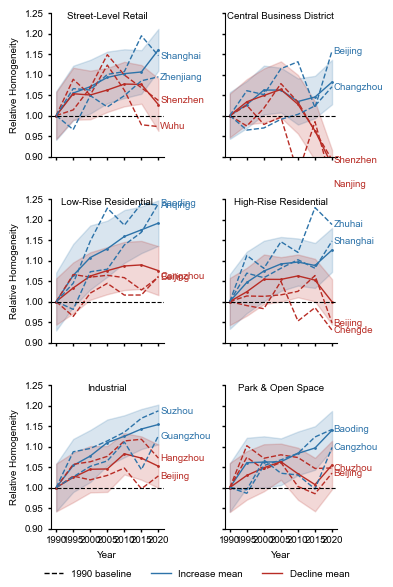

In [5]:
# ...existing code...
# 假设 group_defs 已定义
representative_cities = {'GENERAL_COMMERCIAL': {'Decline': ['Wuhu', 'Shenzhen'],
                                                'Increase': ['Shanghai', 'Zhenjiang']},
                        'HIGH_DENSITY_COMMERCIAL': {'Decline': ['Shenzhen', 'Nanjing'],
                                                    'Increase': ['Beijing', 'Changzhou']},
                        'HIGH_DENSITY_RESIDENTIAL': {'Decline': ['Beijing', 'Chengde'],
                                                    'Increase': ['Shanghai', 'Zhuhai']},
                        'INDUSTRIAL': {'Decline': ['Hangzhou', 'Beijing'],
                                        'Increase': ['Suzhou', 'Guangzhou']},
                        'LOW_DENSITY_RESIDENTIAL': {'Decline': ['Beijing', 'Cangzhou'],
                                                    'Increase': ['Anqing', 'Baoding']},
                        'PARK_OPEN_SPACE': {'Decline': ['Beijing', 'Chuzhou'],
                                            'Increase': ['Baoding', 'Cangzhou']}}

import matplotlib
marker="o"
plt.rcParams['pdf.fonttype']=42 # Ensure fonts are embedded as editable text
plt.rcParams['ps.fonttype']= 42 #Same for Eps files
# 加载自定义字体
import matplotlib.font_manager as fm
arial_font_path = "/home/liyong/code/CityHomogeneity/fronts/ARIAL.TTF"
# 添加 Arial 到 Matplotlib 字体库
fm.fontManager.addfont(arial_font_path)
# 设置全局字体为 Arial
plt.rcParams['font.family'] = 'Arial'

matplotlib.rcParams.update({
    "font.size": 7,           # 全局字体大小
    "axes.titlesize": 7,      # 子图标题
    "axes.labelsize": 7,      # 坐标轴标签
    "xtick.labelsize": 7,     # x轴刻度
    "ytick.labelsize": 7,     # y轴刻度
    "legend.fontsize": 7,     # 图例
})

# 2x2 子图设置：整图宽 100mm
width_mm = 100
fig_w = width_mm / 25.4  # inch
row_h = fig_w*1.48       # 每行高度按宽度比例估计
fig_h = row_h  # 两行加一点底部留白给图例

fig, axes = plt.subplots(3, 2, figsize=(fig_w, fig_h), sharex=True, sharey=False)
axes = axes.ravel()

# 子图顺序（与定义的四个类别一致）
categories_order = [
    "GENERAL_COMMERCIAL",
    "HIGH_DENSITY_COMMERCIAL",
    "LOW_DENSITY_RESIDENTIAL",
    "HIGH_DENSITY_RESIDENTIAL",
    "INDUSTRIAL",
    "PARK_OPEN_SPACE",
]
def format_category(cat):

    mapping = {
        "HIGH_DENSITY_COMMERCIAL": "Central Business District",
        "GENERAL_COMMERCIAL": "Street-Level Retail",
        "HIGH_DENSITY_RESIDENTIAL": "High-Rise Residential",
        "LOW_DENSITY_RESIDENTIAL": "Low-Rise Residential",
        "INDUSTRIAL": "Industrial",
        "PARK_OPEN_SPACE": "Park & Open Space",
    }
    return mapping.get(cat, cat.replace("_", " ").title())
      

start_year = 1990

for i, category in enumerate(categories_order):
    ax = axes[i]
    group_dict = group_defs.get(category, {})
    cat_df = df[df["category_text"] == category].copy()

    # 归一化到基准年
    start_values = cat_df[cat_df["expand_gub"] == start_year].groupby("NAME_2")["homogeneity"].mean()
    cat_df["start_homogeneity"] = cat_df["NAME_2"].map(start_values)
    cat_df["homogeneity_normalized"] = cat_df.apply(
        lambda row: row["homogeneity"] / row["start_homogeneity"]
        if pd.notna(row["start_homogeneity"]) and row["start_homogeneity"] > 0
        else np.nan,
        axis=1,
    )
    cat_df = cat_df.dropna(subset=["homogeneity_normalized"])

    # 分组绘制均值与波动带
    for group, cities in group_dict.items():
        if not cities:
            continue
        sub = cat_df[cat_df["NAME_2"].isin(cities)]
        if sub.empty:
            continue
        mean = sub.groupby("expand_gub")["homogeneity_normalized"].mean()
        std = sub.groupby("expand_gub")["homogeneity_normalized"].std()
        x = mean.index.values
        y = mean.values
        std_filled = np.nan_to_num(std.values, nan=0.0)

        ax.fill_between(x, y - 0.3 * std_filled, y + 0.3 * std_filled, color=color_dict[group], alpha=0.18)
        ax.plot(x, y, color=color_dict[group], linewidth=1, marker="o", markersize=1)

        # --------- 新增：画代表城市的曲线 ---------
    reps = representative_cities.get(category, {})
    for trend, city_list in reps.items():
        for city in city_list:
            city_df = cat_df[cat_df["NAME_2"] == city]
            if city_df.empty:
                continue
            city_mean = city_df.groupby("expand_gub")["homogeneity_normalized"].mean()
            ax.plot(
                city_mean.index.values,
                city_mean.values,
                color=color_dict[trend],
                linewidth=1,
                linestyle="--",
                label=f"{city} ({trend})"
            )
            # 标注城市名（只在最后一个点右侧）
            if len(city_mean) > 0:
                x_last = city_mean.index.values[-1]
                y_last = city_mean.values[-1]
                ax.text(
                    x_last + 0.5, y_last, city,
                    fontsize=7, color=color_dict[trend],
                    va="center", ha="left", fontweight="bold"
                )   # ax.plot(
            #     city_mean.index.values,

    # --------- 新增结束 ---------

    # 基准线（不在各子图加图例，统一在整图底部）
    ax.axhline(y=1.0, color="black", linestyle="--", linewidth=0.8)
        # 去掉上、右边框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(0.8)
    ax.spines['bottom'].set_linewidth(0.8)

    # 用 text 写标题（居中，稍微上移）
    ax.text(
        0.5, 0.95, format_category(category),
        fontsize=7, fontweight='bold', ha='center', va='bottom',
        transform=ax.transAxes
    )

    # ax.set_title(category.replace("_", " "))
    if i==4 or i==5:
        ax.set_xlabel("Year")
    if i==0 or i==2 or i==4:
        ax.set_ylabel(f"Relative Homogeneity")
        ax.set_yticks([0.8,0.85, 0.9, 0.95, 1.0, 1.05, 1.1, 1.15, 1.2, 1.25])
    else:
        ax.set_yticklabels([])  # 只让1和2（即i==0或i==2）显示y轴刻度
    ax.set_xticks([1990, 1995, 2000, 2005, 2010, 2015, 2020])
    ax.set_ylim(0.9, 1.25)  # 保证所有子图y轴范围一致
    ax.tick_params(axis='x', length=2, width=1 )  # x轴刻度线长度为2
    ax.tick_params(axis='y', length=2, width=1) 
    # ax.set_title(format_category(category))
    

# 统一底部图例（整图）
from matplotlib.lines import Line2D
legend_handles = [
    Line2D([0], [0], color="black", lw=1, linestyle="--", label=f"{start_year} baseline"),
    Line2D([0], [0], color=color_dict["Increase"], lw=1, label=label_dict["Increase"]),
    Line2D([0], [0], color=color_dict["Decline"], lw=1, label=label_dict["Decline"]),

]
fig.legend(handles=legend_handles, loc="lower center", ncol=3, frameon=False)

# 留出底部空间给图例
plt.tight_layout(rect=[0, 0.02, 1, 1])
plt.savefig("/home/liyong/code/CityHomogeneity/output/figures/homogeneity_trend_subplots6.pdf", dpi=300)

plt.show()

# ...existing code...

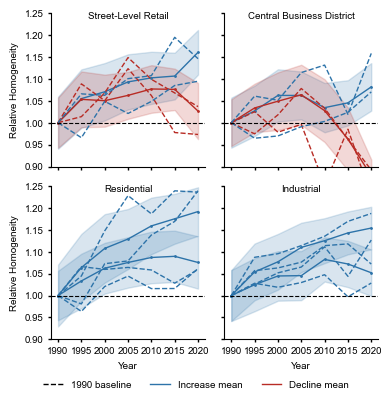

In [16]:
# ...existing code...

# 2x2 子图设置：整图宽 100mm
width_mm = 100
fig_w = width_mm / 25.4  # inch
row_h = fig_w       # 每行高度按宽度比例估计
fig_h = row_h  # 两行加一点底部留白给图例

fig, axes = plt.subplots(2, 2, figsize=(fig_w, fig_h), sharex=True, sharey=False)
axes = axes.ravel()

# 只保留四个类别
categories_order = [
    "GENERAL_COMMERCIAL",
    "HIGH_DENSITY_COMMERCIAL",
    "LOW_DENSITY_RESIDENTIAL",
    "INDUSTRIAL",
]

def format_category(cat):
    mapping = {
        "HIGH_DENSITY_COMMERCIAL": "Central Business District",
        "GENERAL_COMMERCIAL": "Street-Level Retail",
        "LOW_DENSITY_RESIDENTIAL": "Residential",
        "INDUSTRIAL": "Industrial",
    }
    return mapping.get(cat, cat.replace("_", " ").title())

start_year = 1990

for i, category in enumerate(categories_order):
    ax = axes[i]
    group_dict = group_defs.get(category, {})
    cat_df = df[df["category_text"] == category].copy()

    # 归一化到基准年
    start_values = cat_df[cat_df["expand_gub"] == start_year].groupby("NAME_2")["homogeneity"].mean()
    cat_df["start_homogeneity"] = cat_df["NAME_2"].map(start_values)
    cat_df["homogeneity_normalized"] = cat_df.apply(
        lambda row: row["homogeneity"] / row["start_homogeneity"]
        if pd.notna(row["start_homogeneity"]) and row["start_homogeneity"] > 0
        else np.nan,
        axis=1,
    )
    cat_df = cat_df.dropna(subset=["homogeneity_normalized"])

    # 分组绘制均值与波动带
    for group, cities in group_dict.items():
        if not cities:
            continue
        sub = cat_df[cat_df["NAME_2"].isin(cities)]
        if sub.empty:
            continue
        mean = sub.groupby("expand_gub")["homogeneity_normalized"].mean()
        std = sub.groupby("expand_gub")["homogeneity_normalized"].std()
        x = mean.index.values
        y = mean.values
        std_filled = np.nan_to_num(std.values, nan=0.0)
                # 针对 LOW_DENSITY_RESIDENTIAL 和 INDUSTRIAL，将 Decline 组也用 Increase 的颜色
        if category in ["LOW_DENSITY_RESIDENTIAL", "INDUSTRIAL"] and group == "Decline":
            plot_color = color_dict["Increase"]
        else:
            plot_color = color_dict[group]


        ax.fill_between(x, y - 0.3 * std_filled, y + 0.3 * std_filled, color=plot_color, alpha=0.18)
        ax.plot(x, y, color=plot_color, linewidth=1, marker="o", markersize=1)
     # --------- 新增：画代表城市的曲线 ---------
    reps = representative_cities.get(category, {})
    for trend, city_list in reps.items():
        for city in city_list:
            city_df = cat_df[cat_df["NAME_2"] == city]
            if city_df.empty:
                continue
            city_mean = city_df.groupby("expand_gub")["homogeneity_normalized"].mean()
            # 针对 LOW_DENSITY_RESIDENTIAL 和 INDUSTRIAL，将 Decline 组也用 Increase 的颜色
            if category in ["LOW_DENSITY_RESIDENTIAL", "INDUSTRIAL"] and trend == "Decline":
                line_color = color_dict["Increase"]
            else:
                line_color = color_dict[trend]
            ax.plot(
                city_mean.index.values,
                city_mean.values,
                color=line_color,
                linewidth=1,
                linestyle="--",
                label=f"{city} ({trend})"
            )
            # 标注城市名（只在最后一个点右侧）
            # if len(city_mean) > 0:
            #     x_last = city_mean.index.values[-1]
            #     y_last = city_mean.values[-1]
            #     # ax.text(
            #     #     x_last + 0.5, y_last, city,
            #     #     fontsize=7, color=line_color,
            #     #     va="center", ha="left", fontweight="bold"
            #     # ) 
    # --------- 新增结束 ---------

    # 基准线
    ax.axhline(y=1.0, color="black", linestyle="--", linewidth=0.8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(0.8)
    ax.spines['bottom'].set_linewidth(0.8)

    ax.text(
        0.5, 0.95, format_category(category),
        fontsize=7, fontweight='bold', ha='center', va='bottom',
        transform=ax.transAxes
    )

    if i in [2, 3]:
        ax.set_xlabel("Year")
    if i in [0, 2]:
        ax.set_ylabel(f"Relative Homogeneity")
        ax.set_yticks([0.9, 0.95, 1.0, 1.05, 1.1, 1.15, 1.2, 1.25])
    else:
        ax.set_yticklabels([])
    ax.set_xticks([1990, 1995, 2000, 2005, 2010, 2015, 2020])
    ax.set_ylim(0.9, 1.25)
    ax.tick_params(axis='x', length=2, width=1)
    ax.tick_params(axis='y', length=2, width=1)

# 统一底部图例（整图）
from matplotlib.lines import Line2D
legend_handles = [
    Line2D([0], [0], color="black", lw=1, linestyle="--", label=f"{start_year} baseline"),
    Line2D([0], [0], color=color_dict["Increase"], lw=1, label=label_dict["Increase"]),
    Line2D([0], [0], color=color_dict["Decline"], lw=1, label=label_dict["Decline"]),
]
fig.legend(handles=legend_handles, loc="lower center", ncol=3, frameon=False)

plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.savefig("/home/liyong/code/CityHomogeneity/output/figures/homogeneity_trend_subplots4.pdf", dpi=300)
plt.show()
# ...existing code...

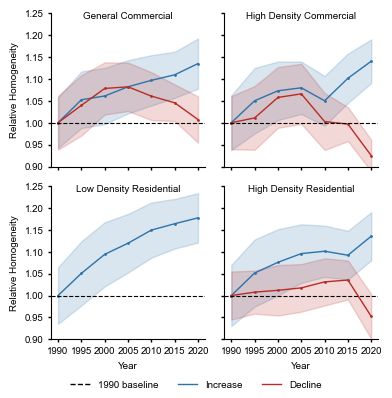

In [42]:
# ...existing code...

import matplotlib
plt.rcParams['pdf.fonttype']=42 # Ensure fonts are embedded as editable text
plt.rcParams['ps.fonttype']= 42 #Same for Eps files
# 加载自定义字体
import matplotlib.font_manager as fm
arial_font_path = "/home/liyong/code/CityHomogeneity/fronts/ARIAL.TTF"
# 添加 Arial 到 Matplotlib 字体库
fm.fontManager.addfont(arial_font_path)
# 设置全局字体为 Arial
plt.rcParams['font.family'] = 'Arial'

matplotlib.rcParams.update({
    "font.size": 7,           # 全局字体大小
    "axes.titlesize": 7,      # 子图标题
    "axes.labelsize": 7,      # 坐标轴标签
    "xtick.labelsize": 7,     # x轴刻度
    "ytick.labelsize": 7,     # y轴刻度
    "legend.fontsize": 7,     # 图例
})

# 2x2 子图设置：整图宽 100mm
width_mm = 100
fig_w = width_mm / 25.4  # inch
row_h = fig_w       # 每行高度按宽度比例估计
fig_h = row_h  # 两行加一点底部留白给图例

fig, axes = plt.subplots(2, 2, figsize=(fig_w, fig_h), sharex=True, sharey=False)
axes = axes.ravel()

# 子图顺序（与定义的四个类别一致）
categories_order = [
    "GENERAL_COMMERCIAL",
    "HIGH_DENSITY_COMMERCIAL",
    "LOW_DENSITY_RESIDENTIAL",
    "HIGH_DENSITY_RESIDENTIAL",
]
def format_category(cat):
    return cat.replace("_", " ").title()

start_year = 1990

for i, category in enumerate(categories_order):
    ax = axes[i]
    group_dict = group_defs.get(category, {})
    cat_df = df[df["category_text"] == category].copy()

    # 归一化到基准年
    start_values = cat_df[cat_df["expand_gub"] == start_year].groupby("NAME_2")["homogeneity"].mean()
    cat_df["start_homogeneity"] = cat_df["NAME_2"].map(start_values)
    cat_df["homogeneity_normalized"] = cat_df.apply(
        lambda row: row["homogeneity"] / row["start_homogeneity"]
        if pd.notna(row["start_homogeneity"]) and row["start_homogeneity"] > 0
        else np.nan,
        axis=1,
    )
    cat_df = cat_df.dropna(subset=["homogeneity_normalized"])

    # 分组绘制均值与波动带
    for group, cities in group_dict.items():
        if not cities:
            continue
        sub = cat_df[cat_df["NAME_2"].isin(cities)]
        if sub.empty:
            continue
        mean = sub.groupby("expand_gub")["homogeneity_normalized"].mean()
        std = sub.groupby("expand_gub")["homogeneity_normalized"].std()
        x = mean.index.values
        y = mean.values
        std_filled = np.nan_to_num(std.values, nan=0.0)

        ax.fill_between(x, y - 0.3 * std_filled, y + 0.3 * std_filled, color=color_dict[group], alpha=0.18)
        ax.plot(x, y, color=color_dict[group], linewidth=1, marker="o", markersize=1)

    # 基准线（不在各子图加图例，统一在整图底部）
    ax.axhline(y=1.0, color="black", linestyle="--", linewidth=0.8)
        # 去掉上、右边框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(0.8)
    ax.spines['bottom'].set_linewidth(0.8)

    # 用 text 写标题（居中，稍微上移）
    ax.text(
        0.5, 0.95, format_category(category),
        fontsize=7, fontweight='bold', ha='center', va='bottom',
        transform=ax.transAxes
    )

    # ax.set_title(category.replace("_", " "))
    if i==2 or i==3:
        ax.set_xlabel("Year")
    if i==0 or i==2:
        ax.set_ylabel(f"Relative Homogeneity")
        ax.set_yticks([0.9, 0.95, 1.0, 1.05, 1.1, 1.15, 1.2, 1.25])
    else:
        ax.set_yticklabels([])  # 只让1和2（即i==0或i==2）显示y轴刻度
    ax.set_xticks([1990, 1995, 2000, 2005, 2010, 2015, 2020])
    ax.set_ylim(0.9, 1.25)  # 保证所有子图y轴范围一致
    ax.tick_params(axis='x', length=2, width=1 )  # x轴刻度线长度为2
    ax.tick_params(axis='y', length=2, width=1) 
    # ax.set_title(format_category(category))
    

# 统一底部图例（整图）
from matplotlib.lines import Line2D
legend_handles = [
    Line2D([0], [0], color="black", lw=1, linestyle="--", label=f"{start_year} baseline"),
    Line2D([0], [0], color=color_dict["steady_increase"], lw=1, label=label_dict["steady_increase"]),
    Line2D([0], [0], color=color_dict["stable_or_decline"], lw=1, label=label_dict["stable_or_decline"]),

]
fig.legend(handles=legend_handles, loc="lower center", ncol=3, frameon=False)

# 留出底部空间给图例
plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.savefig("/home/liyong/code/CityHomogeneity/output/figures/homogeneity_trend_subplots4.pdf", dpi=300)

plt.show()

# ...existing code...